<a href="https://colab.research.google.com/github/vidakpop/Movie-Recommendation-System/blob/main/Movie_Recommendation_System(Capital_Hackathon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Read the data from the text file
file_path = 'data.txt'
data = pd.read_csv(file_path, sep=',')
data



,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2
5,Emily,Pulp Fiction,4
6,Quincy,Star Wars,5
7,Bob,Star Wars,2
8,Frank,Forrest Gump,3
9,Alice,The Matrix,4


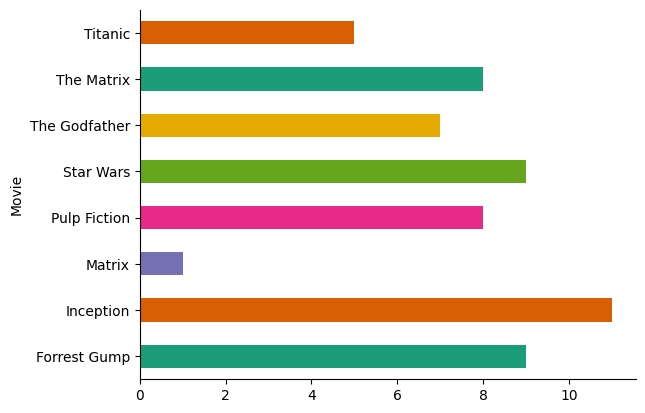

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Movie').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# Clean the data
# Standardize ratings
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Handle missing/erroneous entries
data = data.dropna(subset=['Rating'])  # Drop rows with NaN in 'Rating'

# Convert to CSV
csv_file_path = 'cleaned_data.csv'
data.to_csv(csv_file_path, index=False)

# Display the cleaned data
print("Cleaned Data:")
print(data)


Cleaned Data:
      User          Movie  Rating
0    Alice      Star Wars     5.0
1    Frank  The Godfather     4.0
2      Bob        Titanic     5.0
3    Carol     The Matrix     3.0
4     Dave      Inception     2.0
5    Emily   Pulp Fiction     4.0
6   Quincy      Star Wars     5.0
7      Bob      Star Wars     2.0
8    Frank   Forrest Gump     3.0
9    Alice     The Matrix     4.0
10    Paul        Titanic     4.0
11   Carol      Inception     5.0
12    Dave        Titanic     4.0
13   Emily  The Godfather     5.0
14   Alice      Inception     3.0
15    Paul  The Godfather     5.0
16   Carol   Pulp Fiction     4.0
17     Ivy      Star Wars     5.0
18   Emily   Forrest Gump     3.0
19  Quincy     The Matrix     4.0
20     Ivy     The Matrix     4.0
21    Paul      Inception     1.0
22     Bob  The Godfather     4.0
23   Frank      Star Wars     5.0
24     Ivy      Inception     3.0
25    Dave   Forrest Gump     5.0
26  Quincy      Inception     3.0
27   Karen     The Matrix     3.0


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Collaborative filtering recommendation function
def collaborative_filtering_recommendation(user):
    movie_rating_user = df.pivot_table(index='User', columns='Movie', values='Rating', fill_value=0)
    similarity_matrix = cosine_similarity(movie_rating_user)

    # If the user is in the data or if the user is in the list of users, get movie recommendations based on user similarity
    if user in movie_rating_user.index or user in df['User'].unique():
        user_ratings = movie_rating_user.loc[user] if user in movie_rating_user.index else df[df['User'] == user].set_index('User').squeeze()
        similar_users = pd.Series(similarity_matrix[movie_rating_user.index.get_loc(user)])
        similar_users = similar_users.sort_values(ascending=False)

        recommendations = pd.Series()

        for movie, rating in user_ratings.items():
            similar_movie_ratings = movie_rating_user[movie]
            recommendations = recommendations.append(similar_movie_ratings * rating * similar_users)

        recommendations = recommendations.groupby(recommendations.index).sum()
        recommendations = recommendations.sort_values(ascending=False)

        # Filter movies that the user has already rated
        rated_movies = movie_rating_user.loc[user][movie_rating_user.loc[user] > 0].index
        recommendations = recommendations.drop(rated_movies, errors='ignore')

        return recommendations.head(10).index.tolist()  # Return top 10 recommended movies
    else:
        # If user not found or not in the list, recommend popular movies (fallback system)
        popular_movies = df['Movie'].value_counts().head(10)
        return popular_movies.index.tolist()

# Command-Line Interface (CLI) for user interaction
def user_interface():
    user_name = input("Please enter your username: ")
    recommendations = collaborative_filtering_recommendation(user_name)

    print(f"\nRecommended movies for {user_name}:")
    for idx, movie in enumerate(recommendations, 1):
        print(f"{idx}. {movie}")

# Run the CLI
user_interface()


Please enter your username: Davis

Recommended movies for Davis:
1. Inception
2. Forrest Gump
3. Star Wars
4. The Matrix
5. Pulp Fiction
6. The Godfather
7. Titanic
